# Smoking classification
* ID : index
* gender
* age : 5-years gap
* height(cm)
* weight(kg)
* waist(cm) : Длинна окружности талии 
* eyesight(left) - зренние правого глаза 
* eyesight(right) - зренние левого глаза
* hearing(left) - слух левого уха
* hearing(right) - слух правого уха
* systolic : Blood pressure - кровяное давление 
* relaxation : Blood pressure - давление в спокойствие 
* fasting blood sugar - уровень сахара в крови на тощак
* Cholesterol : total - холестерин всего
* triglyceride - 
* HDL : cholesterol type
* LDL : cholesterol type
* hemoglobin - гемоглобин
* Urine protein - белок мочи 
* serum creatinine - креатин в сыворотке крови 
* AST : glutamic oxaloacetic transaminase type
* ALT : glutamic oxaloacetic transaminase type
* Gtp : γ-GTP
* oral : Oral Examination status
* dental caries - зубной кариес 
* tartar : tartar status
* smoking : 0 or 1

In [1]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import fisher_exact

## Data

In [3]:
df = pd.read_csv('smoking_train.csv')
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,yes
1,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,no
2,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,no
3,5,M,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,no
4,6,M,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,yes


In [4]:
df.shape

(44554, 27)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44554 entries, 0 to 44553
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   44554 non-null  int64  
 1   gender               44554 non-null  object 
 2   age                  44114 non-null  float64
 3   height(cm)           44554 non-null  int64  
 4   weight(kg)           44510 non-null  float64
 5   waist(cm)            44554 non-null  float64
 6   eyesight(left)       44554 non-null  float64
 7   eyesight(right)      44554 non-null  float64
 8   hearing(left)        44554 non-null  float64
 9   hearing(right)       44554 non-null  float64
 10  systolic             44554 non-null  float64
 11  relaxation           44554 non-null  float64
 12  fasting blood sugar  44554 non-null  float64
 13  Cholesterol          44554 non-null  float64
 14  triglyceride         44554 non-null  float64
 15  HDL                  44554 non-null 

In [6]:
print("Переменнная : Количество пропусков")
for i in df.columns:
    if (df[i].isna().any()):
        print(f'{i} : {df[i].isna().sum()}')

Переменнная : Количество пропусков
age : 440
weight(kg) : 44


## Работа с категориальными переменными

In [7]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,yes
1,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,no
2,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,no
3,5,M,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,no
4,6,M,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,yes


In [8]:
df['gender'].value_counts()

M    28372
F    16182
Name: gender, dtype: int64

In [9]:
df['gender'] = [0 if (i == 'F') else 1 for i in df['gender']]
df['gender'].value_counts()

1    28372
0    16182
Name: gender, dtype: int64

In [10]:
df['oral'] = [0 if (i == 'Y') else 1 for i in df['oral']]
df['oral'].value_counts()

0    44554
Name: oral, dtype: int64

In [11]:
df['tartar'].value_counts()

Y    24785
N    19769
Name: tartar, dtype: int64

In [12]:
df['tartar'] = [0 if (i == 'Y') else 1 for i in df['tartar']]
df['smoking'].value_counts()

no     28170
yes    16384
Name: smoking, dtype: int64

In [13]:
df['smoking'] = [0 if (i == 'no') else 1 for i in df['smoking']]
df['smoking'].value_counts()

0    28170
1    16384
Name: smoking, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44554 entries, 0 to 44553
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   44554 non-null  int64  
 1   gender               44554 non-null  int64  
 2   age                  44114 non-null  float64
 3   height(cm)           44554 non-null  int64  
 4   weight(kg)           44510 non-null  float64
 5   waist(cm)            44554 non-null  float64
 6   eyesight(left)       44554 non-null  float64
 7   eyesight(right)      44554 non-null  float64
 8   hearing(left)        44554 non-null  float64
 9   hearing(right)       44554 non-null  float64
 10  systolic             44554 non-null  float64
 11  relaxation           44554 non-null  float64
 12  fasting blood sugar  44554 non-null  float64
 13  Cholesterol          44554 non-null  float64
 14  triglyceride         44554 non-null  float64
 15  HDL                  44554 non-null 

## EDA

In [15]:
test_df = df[df['smoking'] == 1]
test_df.groupby(by='gender').count()['smoking']

gender
0      695
1    15689
Name: smoking, dtype: int64

<Axes: ylabel='gender'>

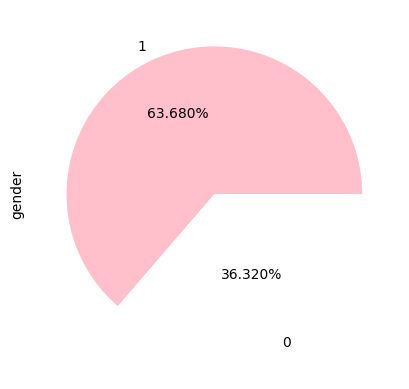

In [16]:
df['gender'].value_counts().plot.pie(autopct='%1.3f%%', colors=['pink', 'white'])

<Axes: ylabel='smoking'>

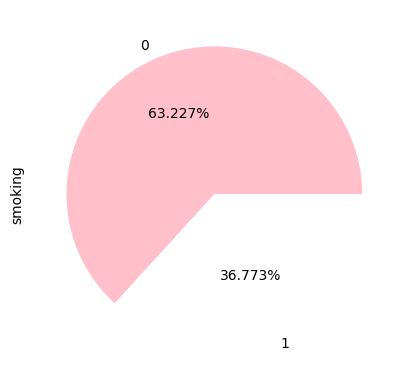

In [17]:
df['smoking'].value_counts().plot.pie(autopct='%1.3f%%', colors=['pink', 'white'])

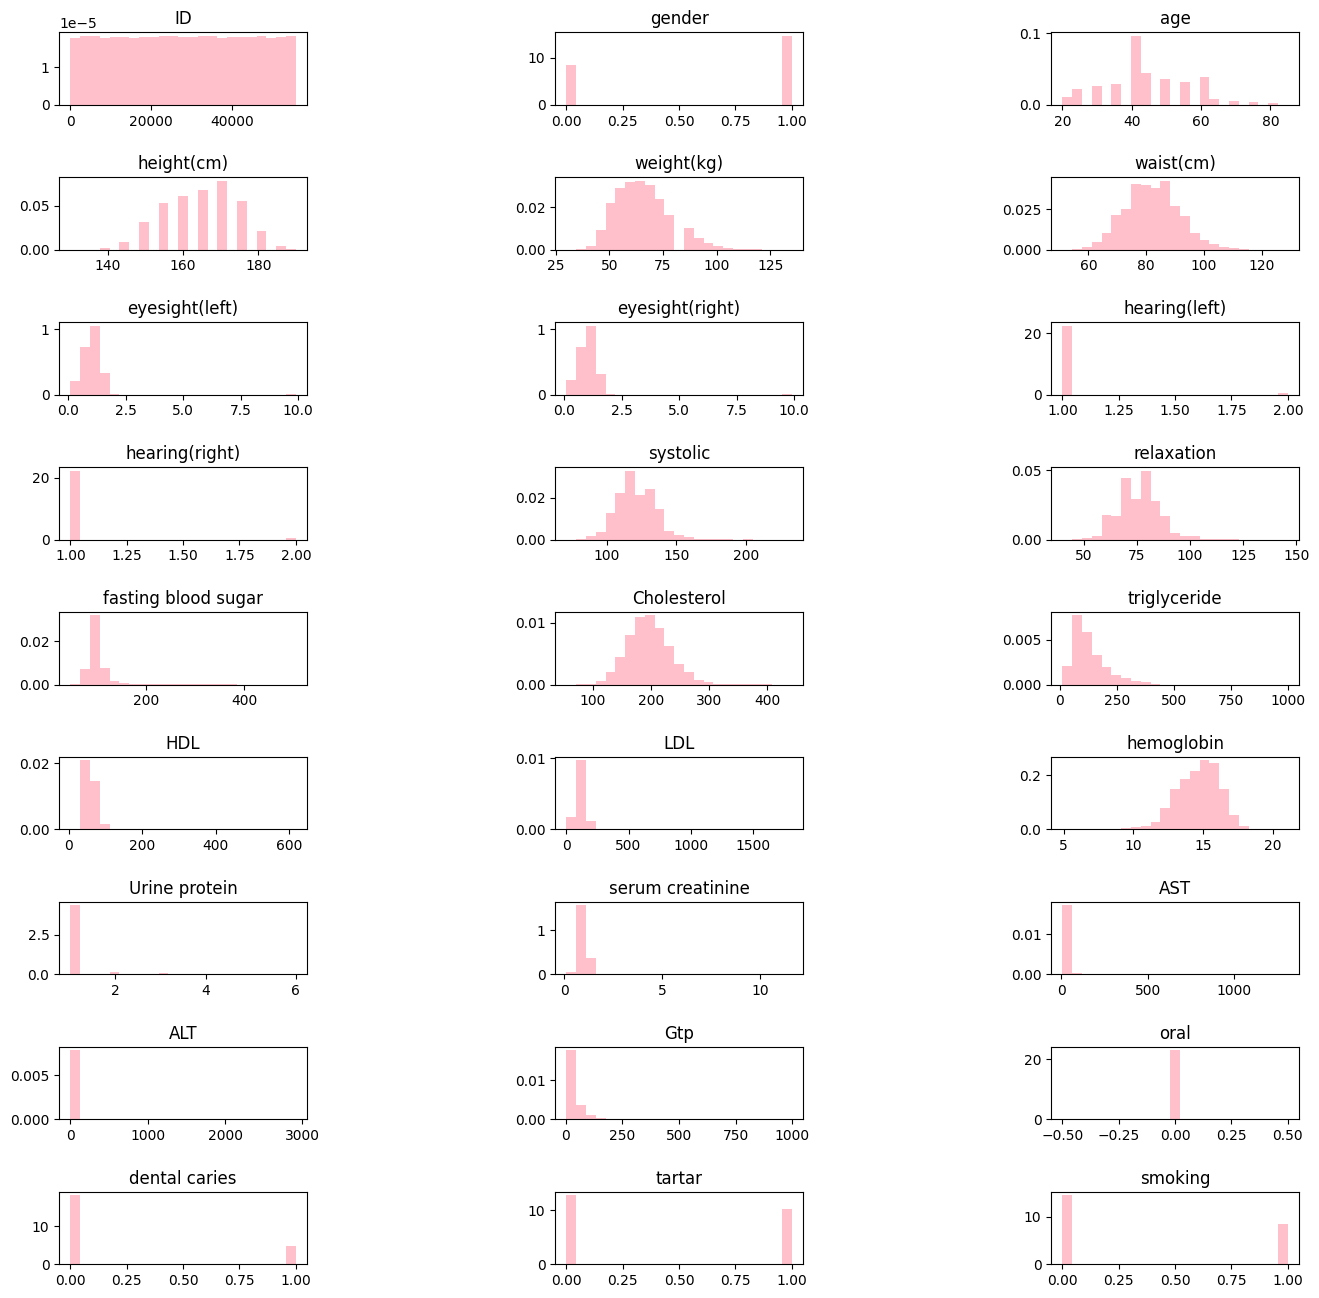

In [18]:
keys = list(df.columns)

fig, axs = plt.subplots(nrows=9, ncols=3, figsize=(16, 16))
fig.subplots_adjust(hspace=1, wspace=1)
for i, col in enumerate(df.columns):
    key = col
    row, col = divmod(i, 3)
    axs[row, col].hist(df[key], density=True, bins=23, color='pink')
    axs[row, col].set_title(key)

plt.show()

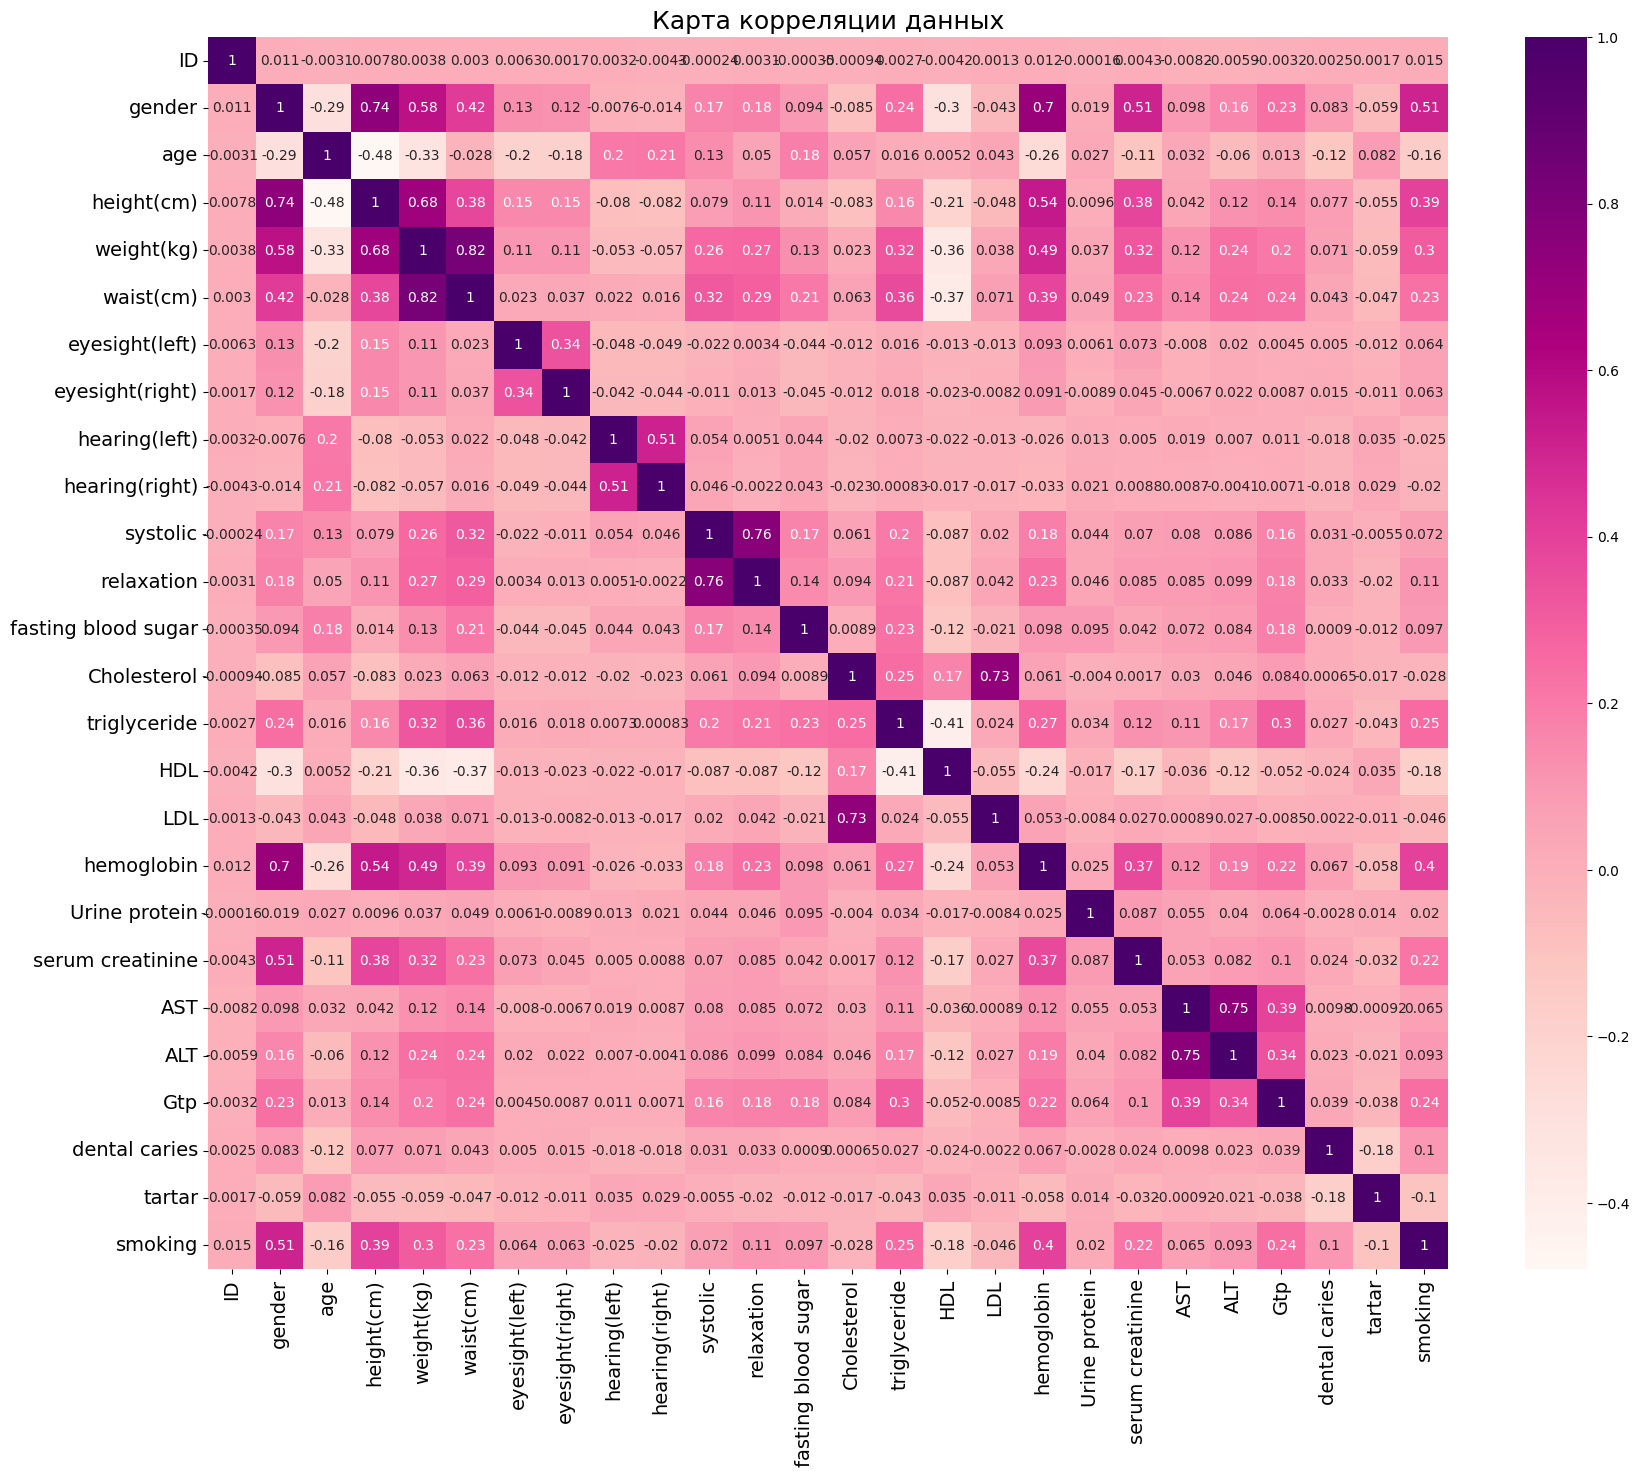

In [19]:
plt.figure(figsize=(20, 16))

temp_df = df.drop(['oral'], axis=1)
dataplot = sns.heatmap(temp_df.corr(), cmap="RdPu", annot=True,annot_kws={'fontsize': 10})

plt.title("Карта корреляции данных", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

## Работа с пропусками 

In [23]:
df.isna().any()

ID                     False
gender                 False
age                     True
height(cm)             False
weight(kg)              True
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
smoking                False
dtype: bool

In [24]:
df['age'] = df['age'].fillna(df['age'].mean())

In [25]:
df['weight(kg)'] = df['weight(kg)'].fillna(df['weight(kg)'].mean())

In [26]:
df.isna().any()

ID                     False
gender                 False
age                    False
height(cm)             False
weight(kg)             False
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
smoking                False
dtype: bool

## StandardScaler

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
x = df.drop(['smoking', 'ID'], axis=1)
y = df[['smoking']]

In [29]:
scaler = StandardScaler()

In [30]:
std = StandardScaler()

X_std = std.fit_transform(x)

X_std = pd.DataFrame(X_std, columns=x.columns)
X_std

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0.755216,0.898022,0.580744,-0.458239,-0.220828,-0.440215,-0.423733,-0.16386,-0.164653,1.208179,...,0.874419,0.752820,-0.215708,0.514185,-0.269763,-0.341084,-0.355909,0.0,-0.520517,1.119701
1,0.755216,-0.349103,0.037847,0.321671,0.641678,1.013009,0.998673,-0.16386,-0.164653,-1.571897,...,2.692977,0.048630,-0.215708,0.514185,-0.373693,-0.034033,-0.434923,0.0,-0.520517,-0.893095
2,-1.324125,-0.349103,-1.047946,-0.458239,0.426052,-0.025008,-0.017331,-0.16386,-0.164653,-0.108699,...,-0.192468,-1.359750,-0.215708,-1.292804,-0.529587,-0.402494,-0.355909,0.0,-0.520517,1.119701
3,0.755216,-1.180520,1.666537,0.711626,0.318238,0.390199,0.389071,-0.16386,-0.164653,0.476580,...,0.340976,1.008889,-0.215708,1.417680,-0.425657,-0.003328,-0.138619,0.0,-0.520517,-0.893095
4,0.755216,-0.349103,-0.505049,-0.458239,0.372145,-0.025008,-0.017331,-0.16386,-0.164653,-0.401338,...,1.019904,1.521028,-0.215708,-0.841057,-0.269763,-0.003328,-0.020098,0.0,1.921167,-0.893095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44549,-1.324125,1.313730,-1.590842,-1.238149,-0.759894,-0.025008,0.389071,-0.16386,-0.164653,-1.425577,...,0.025759,-1.295733,-0.215708,-0.389309,-0.009938,-0.187559,-0.513938,0.0,-0.520517,-0.893095
44550,-1.324125,0.066605,-0.505049,-1.238149,-1.298960,0.390199,0.389071,-0.16386,-0.164653,-1.498737,...,-0.871396,-0.399491,-0.215708,0.062438,-0.321728,-0.463905,-0.513938,0.0,-0.520517,-0.893095
44551,-1.324125,0.898022,-0.505049,-1.238149,-1.460680,-0.025008,0.389071,-0.16386,-0.164653,-0.328178,...,-1.259355,-1.423768,-0.215708,-1.744552,-0.477622,-0.494610,-0.553445,0.0,-0.520517,1.119701
44552,0.755216,1.313730,0.037847,-0.458239,-0.436454,-0.440215,-0.017331,-0.16386,-0.164653,0.842380,...,0.753182,-0.143422,-0.215708,-0.841057,-0.321728,-0.248969,-0.434923,0.0,-0.520517,1.119701


## Logistic Regression

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X_std,y, test_size=0.2, stratify=y, random_state=2)

In [33]:
model = LogisticRegression()

In [34]:
model.fit(x_train,np.array(y_train).ravel())

LogisticRegression()

In [35]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
training_data_accuracy

0.746934882024521

In [36]:
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction, y_test)
test_data_accuracy

0.7430142520480305

In [37]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, x_test_prediction)
cnf_matrix

array([[4362, 1272],
       [1018, 2259]], dtype=int64)

## XGBoost

In [27]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [28]:
model = xgb.XGBClassifier() 

In [29]:
param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 7]
        }

In [30]:
grid_search = GridSearchCV(
    model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)

In [31]:
grid_search.fit(X_std, y)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 1.5, 2, 5],
                         'max_depth': [3, 4, 5, 7],
                         'min_child_weight': [1, 5, 10],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='accuracy')

In [32]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.8}
0.7967651653380902


In [33]:
best_xgb = grid_search.best_estimator_

## Test data

In [34]:
df = pd.read_csv('smoking_test.csv')
ID = df['ID']
df.drop(['ID'], axis=1, inplace=True)
df

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,M,40.0,180,75.0,85.0,1.0,1.2,1.0,1.0,128.0,...,145.0,14.5,1.0,1.0,17.0,18.0,30.0,Y,0,N
1,M,25.0,180,75.0,83.8,0.8,1.2,1.0,1.0,116.0,...,99.0,15.3,1.0,0.9,18.0,14.0,22.0,Y,0,Y
2,F,50.0,155,65.0,86.3,0.3,1.2,1.0,1.0,101.0,...,120.0,13.4,1.0,0.7,19.0,21.0,13.0,Y,0,N
3,F,40.0,155,45.0,74.0,1.2,1.0,1.0,1.0,104.0,...,105.0,13.6,1.0,0.6,18.0,16.0,16.0,Y,0,Y
4,M,30.0,175,70.0,79.0,0.8,1.2,1.0,1.0,119.0,...,57.0,16.6,1.0,0.9,18.0,11.0,22.0,Y,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,F,50.0,160,55.0,66.2,0.6,0.4,1.0,1.0,118.0,...,178.0,12.5,1.0,0.8,22.0,17.0,16.0,Y,0,N
11134,M,30.0,165,65.0,76.0,1.0,1.5,1.0,1.0,130.0,...,147.0,14.9,1.0,1.1,32.0,31.0,19.0,Y,0,Y
11135,F,70.0,145,50.0,81.0,0.8,0.9,1.0,1.0,120.0,...,80.0,14.9,1.0,0.7,36.0,32.0,19.0,Y,0,N
11136,M,40.0,175,80.0,82.2,0.7,0.5,1.0,1.0,130.0,...,110.0,18.0,1.0,1.2,36.0,52.0,71.0,Y,1,Y


In [35]:
df.isna().any()

gender                 False
age                     True
height(cm)             False
weight(kg)              True
waist(cm)              False
eyesight(left)         False
eyesight(right)        False
hearing(left)          False
hearing(right)         False
systolic               False
relaxation             False
fasting blood sugar    False
Cholesterol            False
triglyceride           False
HDL                    False
LDL                    False
hemoglobin             False
Urine protein          False
serum creatinine       False
AST                    False
ALT                    False
Gtp                    False
oral                   False
dental caries          False
tartar                 False
dtype: bool

## Обработаем категориальные переменные 

In [36]:
df['gender'] = [0 if (i == 'F') else 1 for i in df['gender']]
df['gender'].value_counts()

1    7029
0    4109
Name: gender, dtype: int64

In [37]:
df['oral'] = [0 if (i == 'Y') else 1 for i in df['oral']]
df['oral'].value_counts()

0    11138
Name: oral, dtype: int64

In [38]:
df['tartar'] = [0 if (i == 'Y') else 1 for i in df['tartar']]
df['tartar'].value_counts()

0    6155
1    4983
Name: tartar, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11138 entries, 0 to 11137
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               11138 non-null  int64  
 1   age                  11021 non-null  float64
 2   height(cm)           11138 non-null  int64  
 3   weight(kg)           11126 non-null  float64
 4   waist(cm)            11138 non-null  float64
 5   eyesight(left)       11138 non-null  float64
 6   eyesight(right)      11138 non-null  float64
 7   hearing(left)        11138 non-null  float64
 8   hearing(right)       11138 non-null  float64
 9   systolic             11138 non-null  float64
 10  relaxation           11138 non-null  float64
 11  fasting blood sugar  11138 non-null  float64
 12  Cholesterol          11138 non-null  float64
 13  triglyceride         11138 non-null  float64
 14  HDL                  11138 non-null  float64
 15  LDL                  11138 non-null 

## Уберем пропуски

In [40]:
df['age'] = df['age'].fillna(df['age'].mean())

In [41]:
df['weight(kg)'] = df['weight(kg)'].fillna(df['weight(kg)'].mean())

In [42]:
df.isna().any().sum()

0

## Standard Scaler

In [43]:
scaler = StandardScaler()

In [44]:
std = StandardScaler()

X_std = std.fit_transform(df)

X_std = pd.DataFrame(X_std, columns=df.columns)
X_std

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,0.764577,-0.346538,1.681742,0.717184,0.319423,-0.029446,0.427628,-0.154601,-0.160585,0.472254,...,0.755010,-0.074213,-0.214233,0.522287,-0.462219,-0.374331,-0.198057,0.0,-0.521716,1.111395
1,0.764577,-1.600653,1.681742,0.717184,0.189966,-0.423877,0.427628,-0.154601,-0.160585,-0.403373,...,-0.405454,0.434026,-0.214233,0.072141,-0.411702,-0.545519,-0.361549,0.0,-0.521716,-0.899770
2,-1.307913,0.489538,-1.055623,-0.064764,0.459668,-1.409954,0.427628,-0.154601,-0.160585,-1.497906,...,0.124323,-0.773043,-0.214233,-0.828150,-0.361184,-0.245939,-0.545478,0.0,-0.521716,1.111395
3,-1.307913,-0.346538,-1.055623,-1.628660,-0.867264,0.364985,-0.006727,-0.154601,-0.160585,-1.278999,...,-0.254089,-0.645983,-0.214233,-1.278295,-0.411702,-0.459925,-0.484169,0.0,-0.521716,-0.899770
4,0.764577,-1.182615,1.134269,0.326210,-0.327861,-0.423877,0.427628,-0.154601,-0.160585,-0.184466,...,-1.465009,1.259916,-0.214233,0.072141,-0.411702,-0.673910,-0.361549,0.0,-0.521716,1.111395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11133,-1.307913,0.489538,-0.508150,-0.846712,-1.708733,-0.818308,-1.309792,-0.154601,-0.160585,-0.257435,...,1.587517,-1.344813,-0.214233,-0.378004,-0.209631,-0.417128,-0.484169,0.0,-0.521716,1.111395
11134,0.764577,-1.182615,0.039323,-0.064764,-0.651503,-0.029446,1.079160,-0.154601,-0.160585,0.618191,...,0.805465,0.179907,-0.214233,0.972432,0.295545,0.182032,-0.422859,0.0,-0.521716,-0.899770
11135,-1.307913,2.161691,-2.150569,-1.237686,-0.112100,-0.423877,-0.223905,-0.154601,-0.160585,-0.111497,...,-0.884776,0.179907,-0.214233,-0.828150,0.497615,0.224829,-0.422859,0.0,-0.521716,1.111395
11136,0.764577,-0.346538,1.134269,1.108158,0.017357,-0.621092,-1.092615,-0.154601,-0.160585,0.618191,...,-0.127952,2.149336,-0.214233,1.422578,0.497615,1.080771,0.639841,0.0,1.916753,-0.899770


In [45]:
y_pred = best_xgb.predict(X_std)
ans_df = pd.DataFrame()
ans_df['ID'] = ID
ans_df['smoking'] = y_pred
ans_df['smoking'] = ['yes' if(i == 1) else 'no' for i in ans_df['smoking']]

ans_df.to_csv('result.csv', index=False)

ans_df['smoking'].value_counts()

no     6907
yes    4231
Name: smoking, dtype: int64